### Experiment 2 - Logistic Regression 

The Aim to identify players who would play less than 5 years in the NBA 

#### 1. Importing Libraries 

In [36]:
import sys
sys.path.append('../')

from src.visualization.model_evaluation import plot_confusion_matrix, plot_roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import pickle

In [37]:
# Import libraries for logistic regression

from sklearn.linear_model import LogisticRegression

#### 2. Importing Dataset

In [38]:
# importing the dataset 

data = pd.read_csv('..\\data\\processed\\nba_train_processed.csv')

#### 3. Spliting the Dataaset

In [39]:

X = data.drop(['TARGET_5Yrs'], axis = 1)

y = data['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)



#### 4. Initial Modelling 

Logistic Modeliing with cross Validation 

In [40]:
# Perform Logistic Regression with cross validation


logreg = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Train Data')

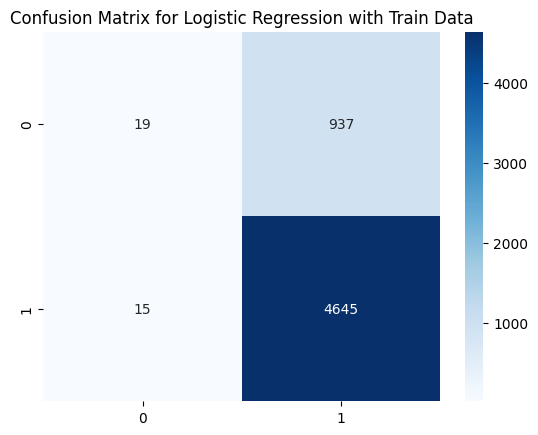

In [41]:
# Plot the confusion matrix with train data

plot_confusion_matrix(y_train, logreg.predict(X_train), title = "Confusion Matrix for Logistic Regression with Train Data")

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Test Data')

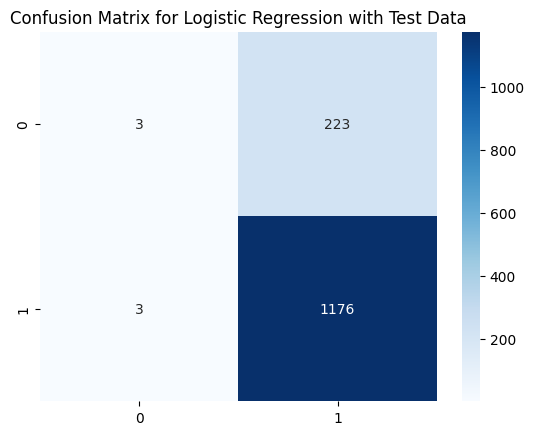

In [42]:
# Plot the confusion matrix with test data

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for Logistic Regression with Test Data")



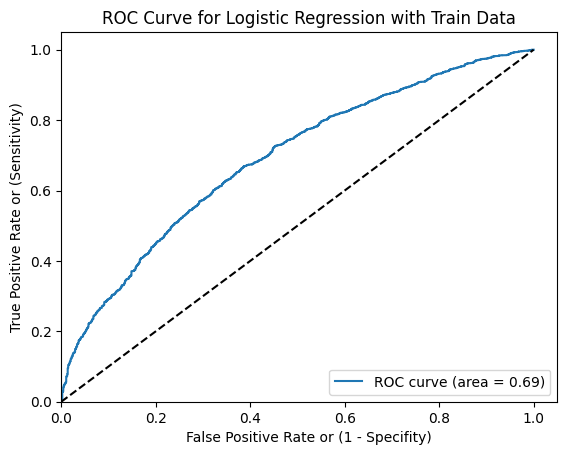

In [43]:
# Plot the ROC Curve for train data

plot_roc_curve(y_train, logreg.predict_proba(X_train)[:,1], "Logistic Regression with Train Data")

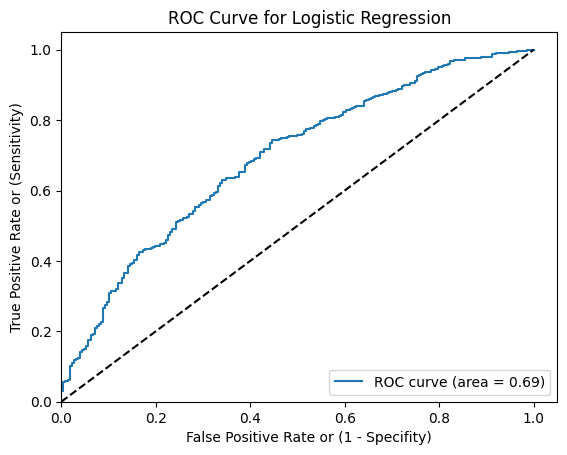

In [44]:
# Plot the ROC curve

plot_roc_curve(y_test, y_pred_prob, model_name="Logistic Regression")

#### 5. Logistic Regression with Grid Search Optimisation

In [45]:
# Grid Search for Logistic Regression

from sklearn.model_selection import GridSearchCV


logreg = LogisticRegression(max_iter=1000)

# Create regularization penalty space

penalty = ['l1', 'l2']

# Create regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Create hyperparameter options

hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# Fit grid search

best_model = clf.fit(X_train, y_train)

# View best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])

print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector

y_pred = best_model.predict(X_test)


d:\Academic\UTS\ADSI\adsi_at1\at1_adsi\at1_adsi\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Academic\UTS\ADSI\adsi_at1\at1_adsi\at1_adsi\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Academic\UTS\ADSI\adsi_at1\at1_adsi\at1_adsi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\Academic\UTS\ADSI\adsi_at1\at1_adsi\at1_a

Best Penalty: l2
Best C: 1.0


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Test Data')

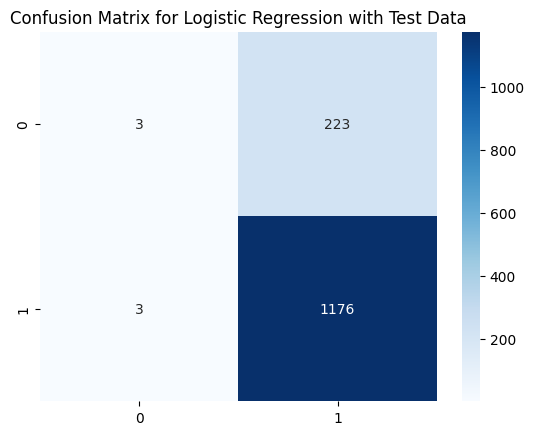

In [46]:
# Confusion Matrix

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for Logistic Regression with Test Data")



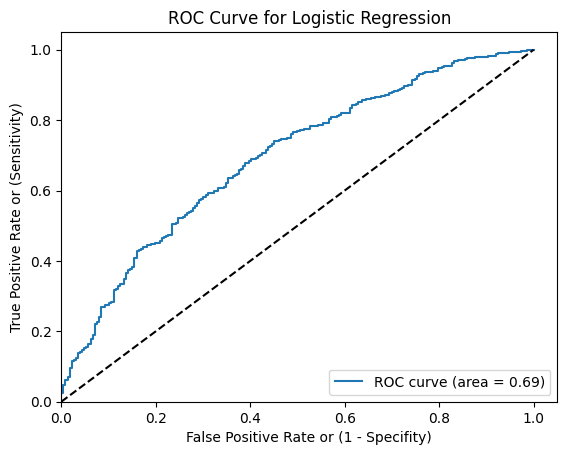

In [47]:
# ROC Curve

plot_roc_curve(y_test, best_model.predict_proba(X_test)[:,1], "Logistic Regression")

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Test Data')

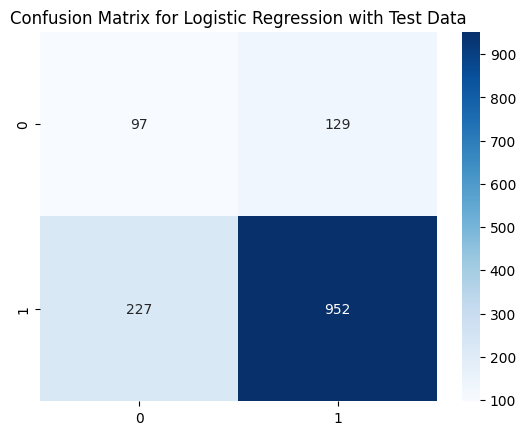

In [48]:
# What if we change the threshold to 0.3?

y_pred_prob = best_model.predict_proba(X_test)[:,1]

y_pred = np.where(y_pred_prob > 0.78, 1, 0)

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for Logistic Regression with Test Data")


#### 6. Balancing Dataset using Stratified Sampling

In [49]:
# Due to Imbalanced Data, Even after adjusting the threshold, the model is not able to predict the minority class well. Using Stratified sampling to balance the data


In [50]:
# Stratified Sampling

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

# Using Stratified K Fold Cross Validation to train a logistic regression model

logreg = LogisticRegressionCV(cv=skf, random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[:,1]




Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Test Data')

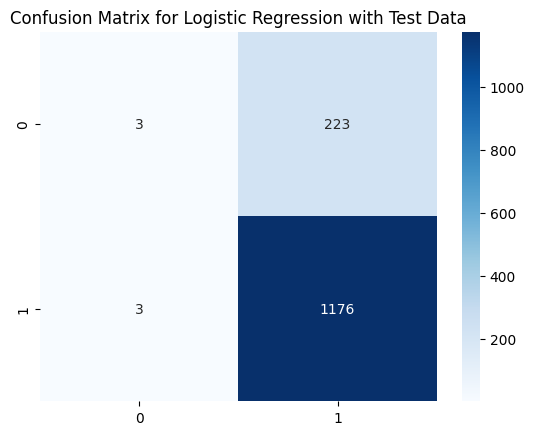

In [51]:
# Confusion Matrix for Stratified K Fold Cross Validation

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for Logistic Regression with Test Data")

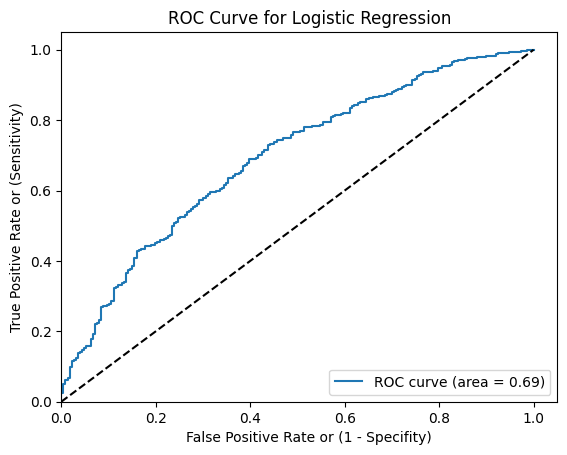

In [52]:
# ROC Curve for Stratified K Fold Cross Validation

plot_roc_curve(y_test, y_pred_prob, model_name="Logistic Regression")

#### 7. Exporting the Model 

In [53]:
# Export the model

pickle.dump(logreg, open('..\\models\\logreg_model.pkl', 'wb'))